# DATA VISUALIZATIONS WITH PYTHON (part 2)

### This script contains the following:
#### 1. Importing libraries
#### 2. Importing data
#### 3. Histogram
#### 4. Loyalty flag bar chart
#### 5. Difference in expenditure by hour of day
#### 6. Age vs Number of dependants
#### 7. Age vs Spending power
#### 8. Exporting visualizations
#### 9. Exporting dataframe

# --------------------------------------------------------------------------------------------------------------

## 1. Importing libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 2. Importing data

In [2]:
# We create a path to add a shortcut to our files location

path = r'C:\Users\javis\OneDrive\Documentos\Career Foundry\2. Data Immersion\4. Python\Instacart Basket Analysis'

In [3]:
# We then give Python the instruction of reading the file located in that path

cust_ords_prods_comb = pd.read_pickle(os.path.join(path, '2. Data', '2.2. Prepared Data', 'cust_orders_products_combined_2.pkl'))

In [4]:
# Let's have a look at frame

cust_ords_prods_comb.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_from_last_order,first_order,product_id,add_to_cart_order,reordered,...,frequency_orders,frequency_flag,surname,gender,state,age,date_joined,dependants,fam_status,income
0,7447,76142,56,5,11,4.0,False,38526,1,1,...,NaN,NaN,Yang,Female,Wisconsin,75,10/23/2017,2,married,80939
1,7447,76142,56,5,11,4.0,False,39747,2,0,...,NaN,NaN,Yang,Female,Wisconsin,75,10/23/2017,2,married,80939
2,7447,76142,56,5,11,4.0,False,27086,3,1,...,NaN,NaN,Yang,Female,Wisconsin,75,10/23/2017,2,married,80939
3,7447,76142,56,5,11,4.0,False,47310,4,0,...,NaN,NaN,Yang,Female,Wisconsin,75,10/23/2017,2,married,80939
4,7447,76142,56,5,11,4.0,False,25577,5,0,...,NaN,NaN,Yang,Female,Wisconsin,75,10/23/2017,2,married,80939


## 3. Order hour of day histogram

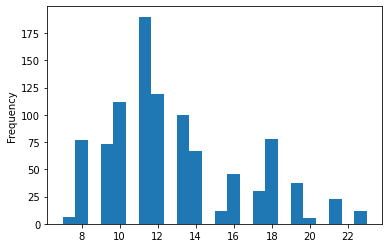

In [5]:
# To create a histogram of the order hour of the day

hour_day_histog = cust_ords_prods_comb['order_hour_of_day'].plot.hist(bins = 24)

The busiest hours of the day are between 9.00h and 17.00h, although from 8-9h and from 15-20h it is also busy. The busiest hours seem to coincide with the normal office hours, indicating that it could be that many of our customers could be office workers.

## 4. Loyalty flag bar chart

In [6]:
# First, we will create a loyalty flag column in our data set, group by criteria and apply the function

cust_ords_prods_comb['max_order'] = cust_ords_prods_comb.groupby(['user_id'])['order_number'].transform(np.max)


In [7]:
# We check the output 

cust_ords_prods_comb.head(15)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_from_last_order,first_order,product_id,add_to_cart_order,reordered,...,frequency_orders,frequency_flag,surname,gender,state,age,date_joined,dependants,fam_status,income
0,7447,76142,56,5,11,4.0,False,38526,1,1,...,NaN,NaN,Yang,Female,Wisconsin,75,10/23/2017,2,married,80939
1,7447,76142,56,5,11,4.0,False,39747,2,0,...,NaN,NaN,Yang,Female,Wisconsin,75,10/23/2017,2,married,80939
2,7447,76142,56,5,11,4.0,False,27086,3,1,...,NaN,NaN,Yang,Female,Wisconsin,75,10/23/2017,2,married,80939
3,7447,76142,56,5,11,4.0,False,47310,4,0,...,NaN,NaN,Yang,Female,Wisconsin,75,10/23/2017,2,married,80939
4,7447,76142,56,5,11,4.0,False,25577,5,0,...,NaN,NaN,Yang,Female,Wisconsin,75,10/23/2017,2,married,80939
5,7447,76142,56,5,11,4.0,False,6343,6,0,...,NaN,NaN,Yang,Female,Wisconsin,75,10/23/2017,2,married,80939
6,7447,76142,56,5,11,4.0,False,38288,7,0,...,NaN,NaN,Yang,Female,Wisconsin,75,10/23/2017,2,married,80939
7,7447,76142,56,5,11,4.0,False,3550,8,0,...,NaN,NaN,Yang,Female,Wisconsin,75,10/23/2017,2,married,80939
8,13258,155252,3,0,9,8.0,False,27086,5,1,...,NaN,NaN,Moses,Male,Delaware,44,7/1/2019,2,married,235739
9,13258,155252,3,0,9,8.0,False,25869,1,0,...,NaN,NaN,Moses,Male,Delaware,44,7/1/2019,2,married,235739


In [8]:
# With the new column ready, we have to create a flag to denominate the loyalty of the customers

cust_ords_prods_comb.loc[cust_ords_prods_comb['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [9]:
# We do the same for regular customers

cust_ords_prods_comb.loc[(cust_ords_prods_comb['max_order'] <= 40) & (cust_ords_prods_comb['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [10]:
# And for new customers

cust_ords_prods_comb.loc[cust_ords_prods_comb['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [11]:
# As a good practice, we check the frequency 

cust_ords_prods_comb['loyalty_flag'].value_counts(dropna = False)

Regular customer    465
New customer        457
Loyal customer       65
Name: loyalty_flag, dtype: int64

In [12]:
cust_ords_prods_comb.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_from_last_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices', 'price_range',
       'price_range_loc', 'busiest_day', 'Busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'spending_flag', 'frequency_orders',
       'frequency_flag', 'surname', 'gender', 'state', 'age', 'date_joined',
       'dependants', 'fam_status', 'income'],
      dtype='object')

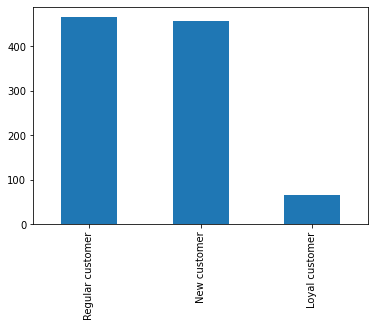

In [13]:
# To create a bar chart for the loyalty

bar = cust_ords_prods_comb['loyalty_flag'].value_counts().plot.bar()

## 5. Line chart - Difference in expenditure by hour of day

In this case, due to the tiny size of the resulting dataframe I am working with, I will show the steps I would take to create a random sample in a big file, to be able to do specific charts with the desired columns on a small sample. However, I won't execute the functions as I don't want to reduce more my file. I will just create a subset with the 2 columns to include in analysis.

In [14]:
# To create a split in the data of 70/30, we create a list holding True/False values to the test np.random.rand() <= 0.7

# np.random.seed(4)
# dev = np.random.rand(len(cust_ords_prods_comb)) <= 0.7

In [15]:
# To store 70% of data in big sample
# big = cust_ords_prods_comb [dev]

In [16]:
# To store 30% of the sample in the dataframe small

# small = cust_ords_prods_comb[~dev]

In [17]:
# TO check that our two dataframes are the 70 and 30% respectively

# len (big) + len(small)

Once you complete these steps 

In [18]:
# Before creating the line chart, we will choose the columns we need 

df_2 = cust_ords_prods_comb[['order_hour_of_day','prices']]

<Figure size 1440x720 with 0 Axes>

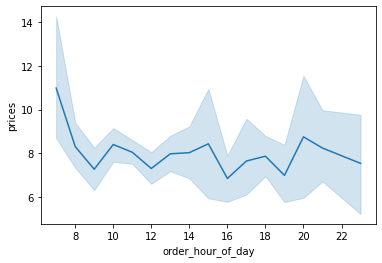

<Figure size 1440x720 with 0 Axes>

In [19]:
# To create the line chart

prices_by_h_line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')
plt.figure(figsize=(20,10))

We can see the line is fluctuating along the whole day. The highest prices are paid between 2-7am, it could be due to the habits of the consumers shopping at that time. 9am-midday are the hours with less price paid as an average, what it could indicate that this timeframe might need extra marketing efforts. After that, the paid prices stay stable with just some peaks. 

## 6. Line chart - Age and Number of dependants

In [20]:
# like in previous exercise, firstly we choose the two columns to analyse

df_3 = cust_ords_prods_comb[['age', 'dependants']]

<Figure size 1440x720 with 0 Axes>

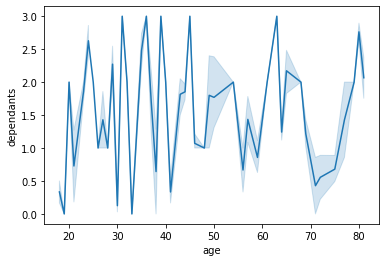

<Figure size 1440x720 with 0 Axes>

In [21]:
# To create the linechart

age_vs_dependants_line = sns.lineplot(data = df_3, x = 'age', y = 'dependants')
plt.figure(figsize=(20,10))

We can see that the line is completely fluctuating, showing that there is no apparent relationship between number of dependants and age of the customers. 

## 7. Scatterplot - Age and spending power

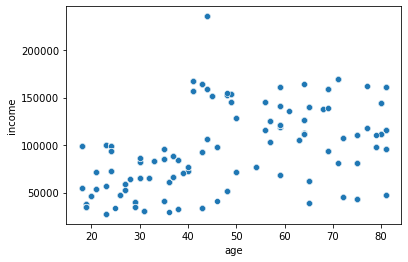

In [22]:
# To create the scatterplot to show relationship between age and spending power, 

scatter = sns.scatterplot(x = 'age', y = 'income', data = cust_ords_prods_comb)

We can observe how there is a bigger accumulation of dots once the age reaches 40 years old. Before seeing the graph you could have hypothesysed that this would happen, since older people is usually more settle down in workplaces and life in general than young people, leading to higher purchasing power. 

## 8. Exporting visualizations

In [23]:
# To export the histogram of orders by hours of day

hour_day_histog.figure.savefig(os.path.join(path, '4. Analysis', '4.1. Visualizations', 'hours_day_histogram_2.png'))

In [24]:
# To export the histogram for the loyalty flag

bar.figure.savefig(os.path.join(path, '4. Analysis', '4.1. Visualizations', 'loyalty_flag_bar_chart_2.png'))

In [25]:
# To export the line chart showing the prices paid as average by hour of the day

prices_by_h_line.figure.savefig(os.path.join(path, '4. Analysis', '4.1. Visualizations', 'price_hour_line_chart_2.png'))

In [26]:
# To export the line chart showing the relationship between age and number of dependants

age_vs_dependants_line.figure.savefig(os.path.join(path, '4. Analysis', '4.1. Visualizations', 'age_depend_line_chart_2.png'))

In [27]:
# To export the scatterplot showing age and income

scatter.figure.savefig(os.path.join(path, '4. Analysis', '4.1. Visualizations', 'age_income_scatt_2.png'))

## 9. Exporting dataframe

In [28]:
# To export the df as a pkl

cust_ords_prods_comb.to_pickle(os.path.join(path, '2. Data','2.2. Prepared Data', 'Instacart_complete.pkl'))